## 1.

### a)


Wyznaczenie widma amplitudowego:

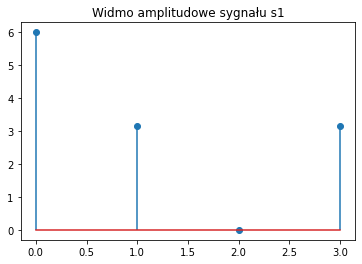

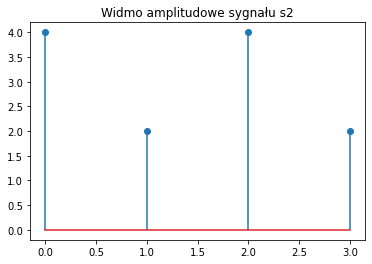

In [1]:
import matplotlib.pyplot as plt
import numpy as np

s1 = np.array([3, 1, 0, 2])
s2 = np.array([0, 1, 0, 3])

s1_fft = np.fft.fft(s1)
s2_fft = np.fft.fft(s2)

plt.stem(np.abs(s1_fft))
plt.title("Widmo amplitudowe sygnału s1")
plt.show()
plt.title("Widmo amplitudowe sygnału s2")

plt.stem(np.abs(s2_fft))
plt.show()

Wyznaczenie widma fazowego:

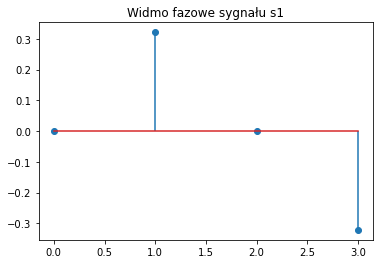

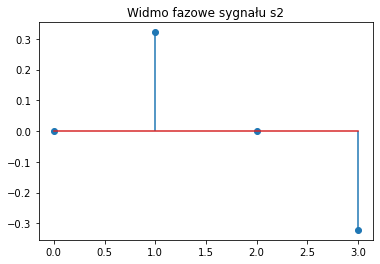

In [2]:
plt.stem(np.angle(s1_fft))
plt.title("Widmo fazowe sygnału s1")
plt.show()
plt.title("Widmo fazowe sygnału s2")
plt.stem(np.angle(s1_fft))
plt.show()

Obliczenie mocy sygnałów i sprawdzenie słuszności twierdzenia Parsevala:

In [3]:

print(f"Moc sygnału s1 obliczona bezpośrednio: {np.sum(np.square(s1))}")
print(f"Moc sygnału s1 obliczona z fft: {np.sum(np.square(np.abs(s1_fft)))}")

print(f"Moc sygnału s2 obliczona bezpośrednio: {np.sum(np.square(s2))}")
print(f"Moc sygnału s2 obliczona z fft: {np.sum(np.square(np.abs(s2_fft)))}")


Moc sygnału s1 obliczona bezpośrednio: 14
Moc sygnału s1 obliczona z fft: 56.0
Moc sygnału s2 obliczona bezpośrednio: 10
Moc sygnału s2 obliczona z fft: 40.0


Wyniki są zgodne z twierdzeniem Parsevala; obliczone moce dla sygnałów s1 i s2 odpowiednio w dziedzinie częstotliwości i czasu są sobie równe.

## b)

In [4]:
splot = np.zeros(s1.shape)
for n in range(s1.size):
    for m in range(s2.size):
        splot[n] += s1[m] * s2[n - m]
print(splot)

print(np.fft.ifft(s1_fft * s2_fft))

[5. 3. 7. 9.]
[5.+0.j 3.+0.j 7.+0.j 9.+0.j]


### 2.

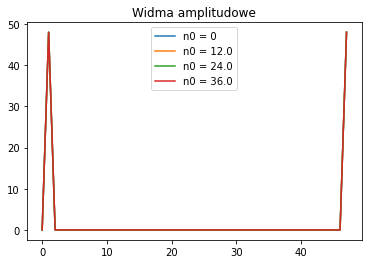

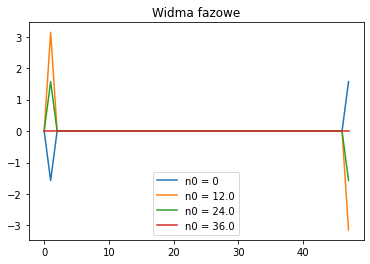

In [5]:
A = 2
N = 48
ns = [0, N/4, N/2, 0.75*N]

s = lambda n : A * np.sin(2*np.pi*n/N)

x = np.arange(0, 48)
ys = [s(x - n0) for n0 in ns]
ys_fft = np.fft.fft(ys)

ys_fft[np.abs(ys_fft) < 1e-6] = 0
for i in range(ys_fft.shape[0]):
    plt.plot(x, np.abs(ys_fft[i]), label=f"n0 = {ns[i]}")
plt.title("Widma amplitudowe")
plt.legend()
plt.show()

for i in range(ys_fft.shape[0]):
    plt.plot(x, np.angle(ys_fft[i]), label=f"n0 = {ns[i]}")
    plt.title("Widma fazowe")
plt.legend()
plt.show()

### 3.

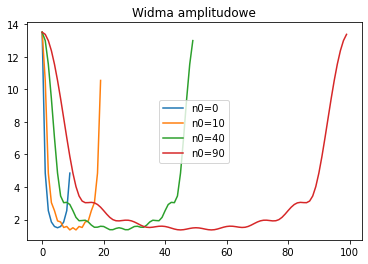

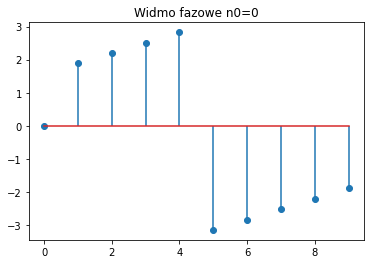

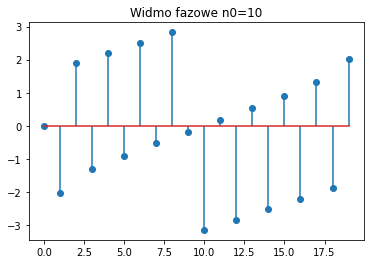

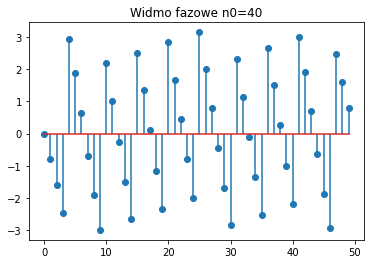

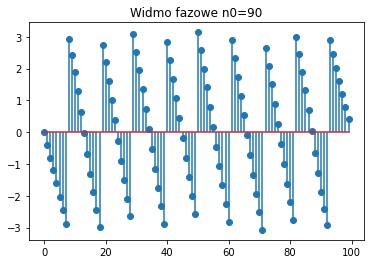

In [38]:
A = 3
N = 10
N0 = [0, N, 4*N, 9*N]

s = lambda n : A * (n % N)/N

ys = [np.zeros(N0[i]+N) for i in range(len(N0))]
for i in range(len(N0)):
    for j in range(N):
        ys[i][j] = s(j)
ys_fft = [np.fft.fft(ys[i]) for i in range(len(N0))]
xs = [np.arange(N0[i] + N) for i in range(len(N0))]
for i in range(len(N0)):
    plt.plot(xs[i], np.abs(ys_fft[i]), label=f"n0={N0[i]}")
plt.title("Widma amplitudowe")
plt.legend()
plt.show()
for i in range(len(N0)):
    plt.title(f"Widmo fazowe n0={N0[i]}")
    plt.stem(xs[i], np.angle(ys_fft[i]))
    plt.show()

Dodanie zer powoduje, że zwiększa się liczba punktów w których obliczana jest FFT, dlatego wykresy są badziej szczegółowe.

### 4.

In [ ]:
A1 = 0.3
F1 = 5000
A2 = 0.4
F2 = 6000
A3 = 0.5
F3 = 11000
FS  = 48000
N1 = 2048
N2 = 3/2*N1
s = lambda t : A1*np.sin(2*np.pi*F1*t) + A2*np.sin(2*np.pi*F2*t) + A3*np.sin(2*np.pi*F3*t)
n = np.arange(N1)
print(n)
y = s(n/N)
y_rfft = np.fft.rfft(y)
plt.stem(2*np.abs(y_rfft)/y.shape[0])

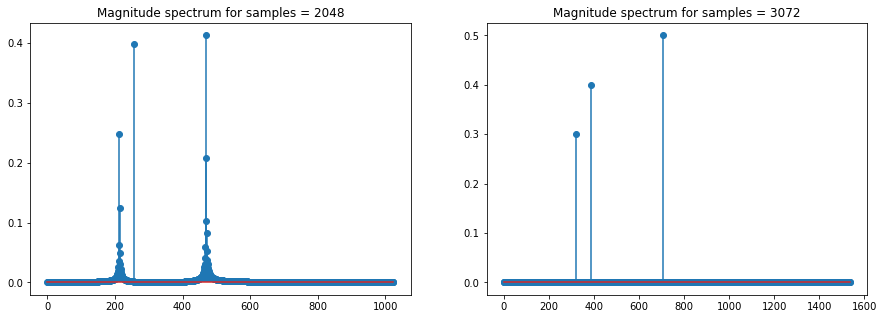

In [67]:
A1 = 0.3
F1 = 5000
A2 = 0.4
F2 = 6000
A3 = 0.5
F3 = 11000
FS  = 48000
N1 = 2048
N2 = 3*N1//2
signal_func = lambda t : A1*np.sin(2*np.pi*F1*t) + A2*np.sin(2*np.pi*F2*t) + A3*np.sin(2*np.pi*F3*t)
_, axs = plt.subplots(1, 2, figsize=(15, 5))
for x_idx, N1 in enumerate([2048, 3*2048//2]):
    signal = [signal_func(n/48000) for n in range(N1)]
    a = axs[x_idx]
    a.stem([2*np.abs(val)/len(signal) for val in np.fft.rfft(signal)])
    a.set_title(f'Magnitude spectrum for samples = {N1}')
plt.show()

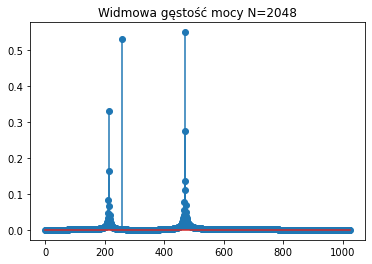

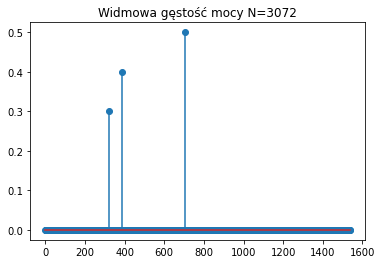

In [72]:
A1 = 0.3
F1 = 5000
A2 = 0.4
F2 = 6000
A3 = 0.5
F3 = 11000
FS  = 48000
N1 = 2048
N2 = 3*N1//2
s = lambda t : A1*np.sin(2*np.pi*F1*t) + A2*np.sin(2*np.pi*F2*t) + A3*np.sin(2*np.pi*F3*t)
n = np.arange(N1)/FS
y = s(n)
y_rfft = 2*np.fft.rfft(y)/y_rfft.shape[0]
plt.title(f"Widmowa gęstość mocy N={N1}")
plt.stem(np.abs(y_rfft))
plt.show()
n = np.arange(N2)/FS
y = s(n)
y_rfft = np.fft.rfft(y)
plt.title(f"Widmowa gęstość mocy N={N2}")
plt.stem(2*np.abs(y_rfft)/y.shape[0])
plt.show()

Dla N=2048 występuje zjawisko przecieku widma. Okres sygnału to NWD(5000Hz,6000Hz,11000Hz) = 1000Hz, a czestotliwość próbkowania to 48000Hz, więc sygnał powinien się powtarzać co 48 próbek. Liczba próbek powinna być więc podzielna przez 48 (np. 3072), żeby efekt nie występował.